# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# 1. EDA - Exploratory Data Analysis

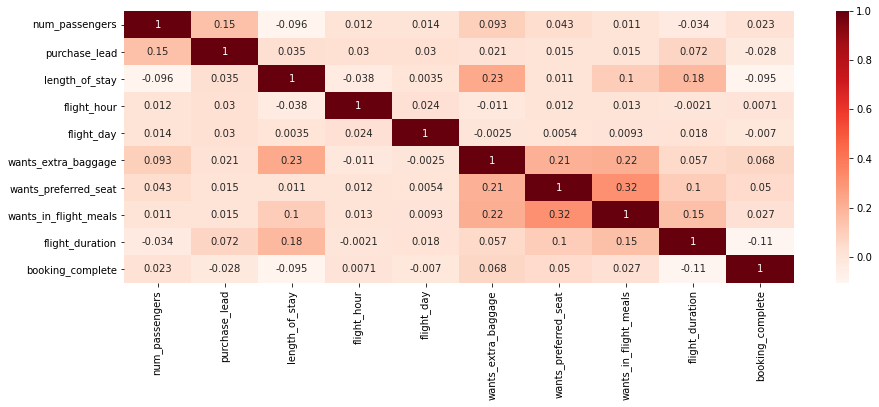

In [37]:
# correlation on numerical data
plt.figure(figsize=(15,5))
sns.heatmap(df_numerical.corr() , annot=True, cmap="Reds")
plt.show()

In [43]:
DF = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

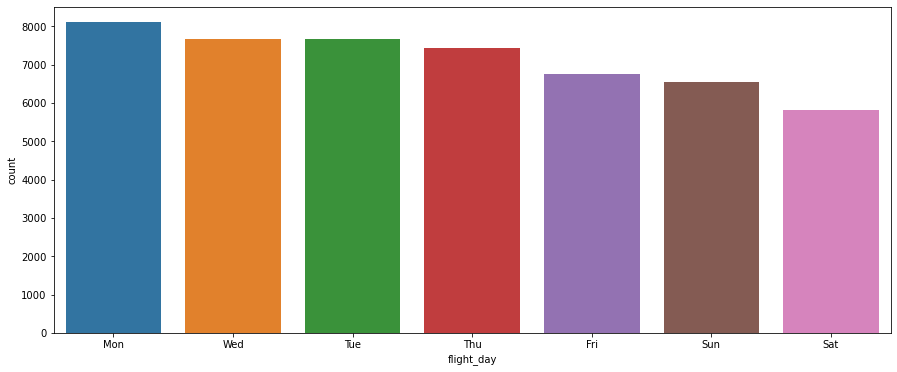

In [44]:
# number of flights on each day in a week
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day", data=DF, order=DF["flight_day"].value_counts().index)
plt.show()

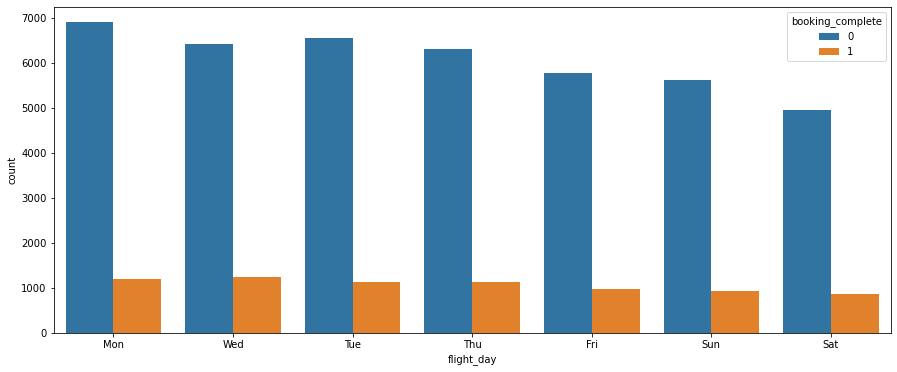

In [45]:
# flight day with booking details - max flight on Mon, least flight on Sat 
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day",hue = "booking_complete", data=DF, order=DF["flight_day"].value_counts().index)
plt.show()

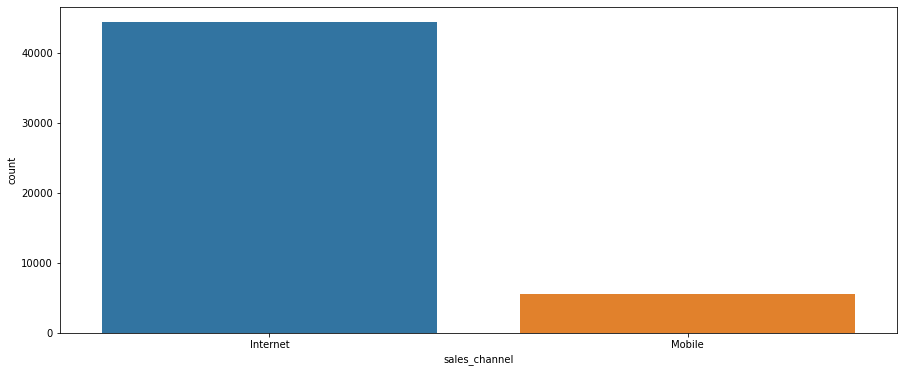

In [46]:
# means of booking (channel)
plt.figure(figsize=(15,6))
sns.countplot(x = "sales_channel", data=DF, order=DF["sales_channel"].value_counts().index)
plt.show()

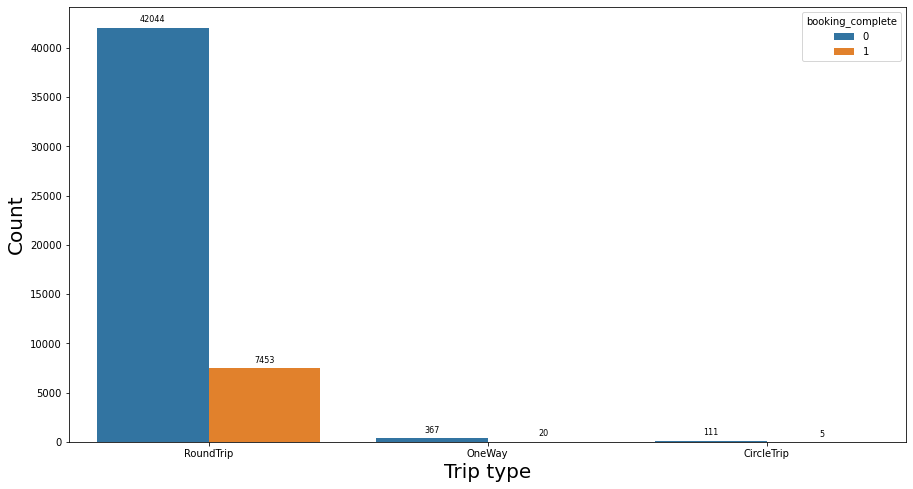

In [57]:
# Trip type - round trip
plt.figure(figsize=(15,8))
plots = sns.countplot(x="trip_type", hue="booking_complete" , data=DF ,order=DF.trip_type.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Trip type",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')   

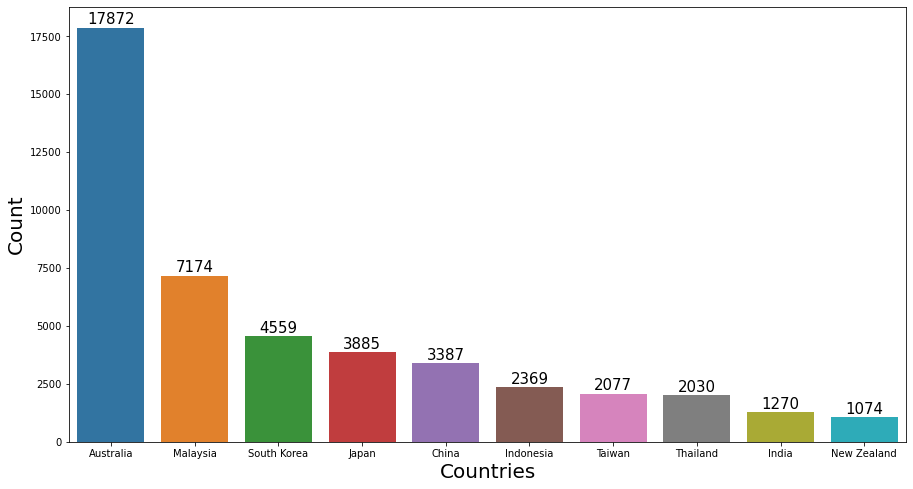

In [52]:
# Top 10 countries
plt.figure(figsize=(15,8))
plots = sns.countplot(x="booking_origin",  data=DF ,order=DF.booking_origin.value_counts().iloc[:10].index)
plt.xlabel("Countries",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')   

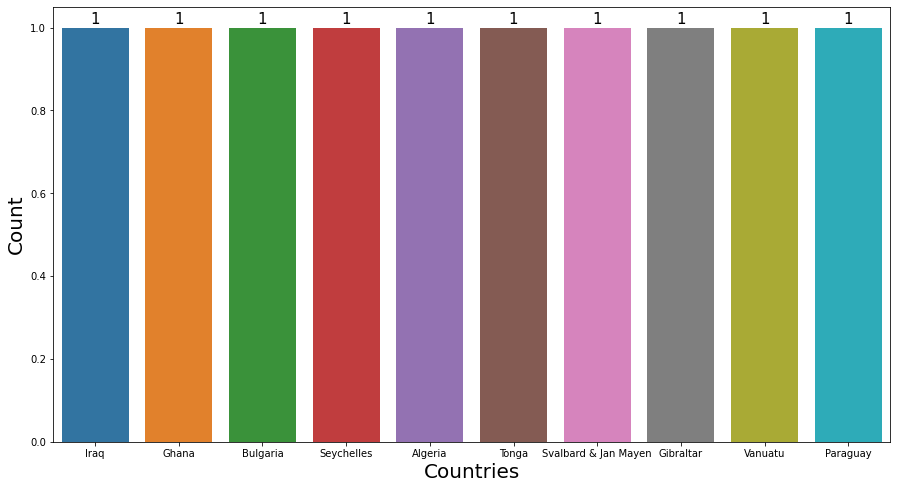

In [53]:
# Bottom 10 countries
plt.figure(figsize=(15,8))
plots = sns.countplot(x="booking_origin",  data=DF ,order=DF.booking_origin.value_counts().iloc[-10:].index)
plt.xlabel("Countries",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')   

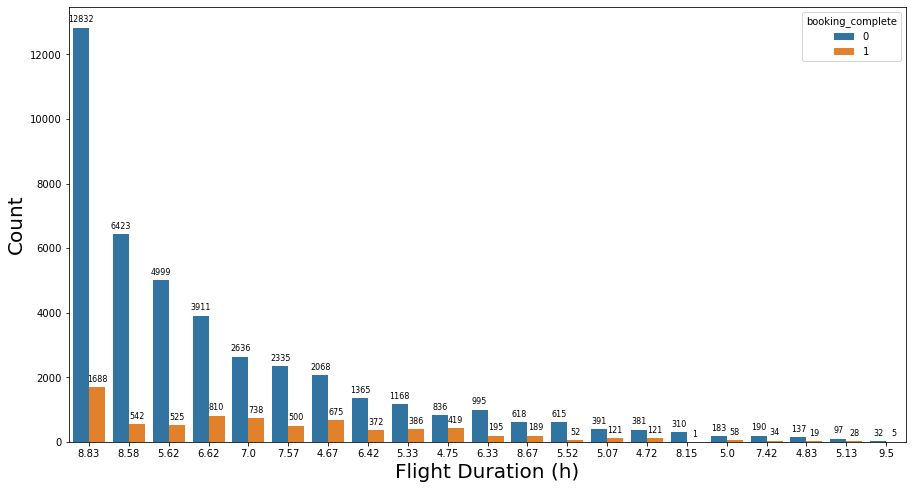

In [56]:
# Flight hour and booking complete
plt.figure(figsize=(15,8))
plots = sns.countplot(x="flight_duration", hue="booking_complete" , data=DF ,order=DF.flight_duration.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration (h)",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')   

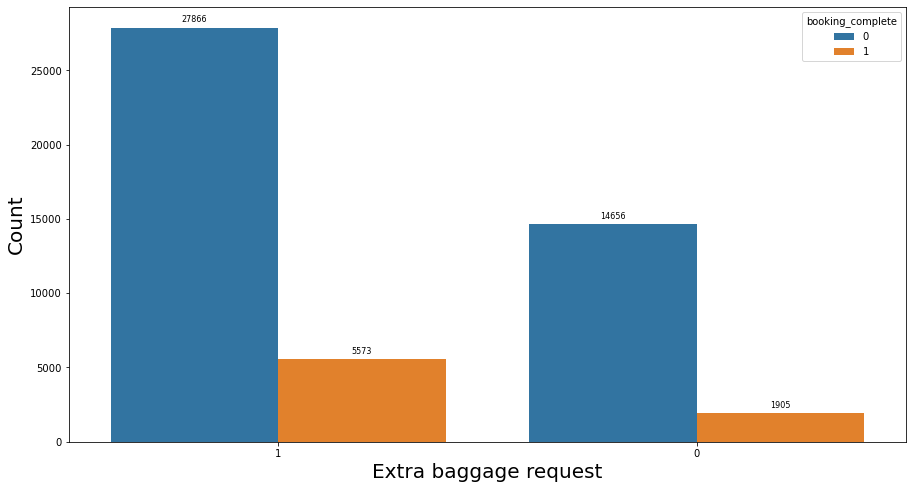

In [59]:
# Extra baggage with flight booking?
plt.figure(figsize=(15,8))
plots = sns.countplot(x="wants_extra_baggage", hue="booking_complete" , data=DF ,order=DF.wants_extra_baggage.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Extra baggage request",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')   

# 2. Data Preprocessing - for Model Prediction

In [9]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [10]:
df_categorical = df.select_dtypes(include='object')
df_numerical = df.select_dtypes(exclude='object')

In [11]:
df_categorical.head()

,sales_channel,trip_type,route,booking_origin
0,Internet,RoundTrip,AKLDEL,New Zealand
1,Internet,RoundTrip,AKLDEL,New Zealand
2,Internet,RoundTrip,AKLDEL,India
3,Internet,RoundTrip,AKLDEL,New Zealand
4,Internet,RoundTrip,AKLDEL,India


In [12]:
for col in df_categorical:
    print(df_categorical[col].value_counts())
    print('\n')

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64


RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64


AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
JEDPEN       1
BTJJED       1
PEKSGN       1
AORPER       1
BDOWUH       1
Name: route, Length: 799, dtype: int64


Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Tonga                       1
Svalbard & Jan Mayen        1
Gibraltar                   1
Vanuatu                     1
Paraguay                    1
Name: booking_origin, Length: 104, dtype: int64




## One-Hot Encoding
Use `get_dummies`: Convert categorical variable into dummy/indicator variables

In [13]:
columns = ['sales_channel', 'trip_type', 'route', 'booking_origin']
for value in columns:
    df_categorical = pd.get_dummies(df_categorical, columns=[value], drop_first=True)

In [14]:
df_categorical.shape

(50000, 904)

In [15]:
df_categorical.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLMRU,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Outlier detection of numerical data

In [16]:
df_numerical.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,6,1,0,0,5.52,0
1,1,112,20,3,6,0,0,0,5.52,0
2,2,243,22,17,3,1,1,0,5.52,0
3,1,96,31,4,6,0,0,1,5.52,0
4,2,68,22,15,3,1,0,1,5.52,0


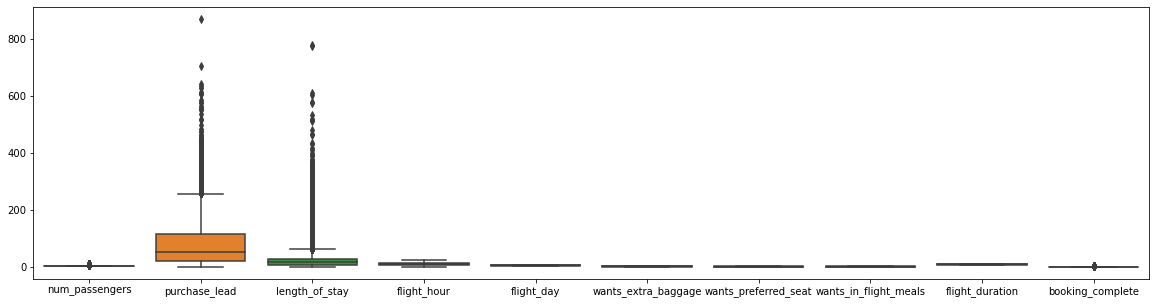

In [17]:
plt.figure(figsize = (20,5))
sns.boxplot(data = df_numerical)
plt.show()

In [18]:
column_num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration']

# replace outlier values with median 
for feature in column_num:
    Q1 = df_numerical[feature].quantile(0.25)
    Q3 = df_numerical[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    median = df_numerical[feature].median()
    
    df_numerical[feature] = np.where(df_numerical[feature] < lower_limit, median, df_numerical[feature])
    df_numerical[feature] = np.where(df_numerical[feature] > upper_limit, median, df_numerical[feature])

<ipython-input-18-08a72c4e886c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical[feature] = np.where(df_numerical[feature] < lower_limit, median, df_numerical[feature])
<ipython-input-18-08a72c4e886c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical[feature] = np.where(df_numerical[feature] > upper_limit, median, df_numerical[feature])
<ipython-input-18-08a72c4e886c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

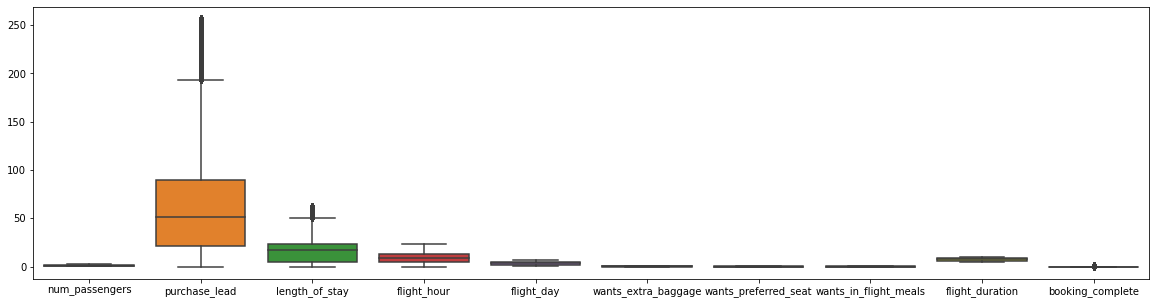

In [19]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df_numerical)
plt.show()

## Feature Standardization
with `StandardScaler` from `sklearn`

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# join both categorical (one-hot encoded) and numerical data tgt
df = pd.concat([df_categorical, df_numerical], axis = 1)
df.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLMRU,...,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,0,1,0,0,0,0,0,0,0,...,2.0,51.0,19.0,7.0,6,1.0,0.0,0.0,5.52,0
1,0,0,1,0,0,0,0,0,0,0,...,1.0,112.0,20.0,3.0,6,0.0,0.0,0.0,5.52,0
2,0,0,1,0,0,0,0,0,0,0,...,2.0,243.0,22.0,17.0,3,1.0,1.0,0.0,5.52,0
3,0,0,1,0,0,0,0,0,0,0,...,1.0,96.0,31.0,4.0,6,0.0,0.0,1.0,5.52,0
4,0,0,1,0,0,0,0,0,0,0,...,2.0,68.0,22.0,15.0,3,1.0,0.0,1.0,5.52,0


In [22]:
x = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']

In [23]:
standardizer = StandardScaler()
scaled_x = standardizer.fit_transform(x)

In [24]:
scaled_x_df = pd.DataFrame(scaled_x)
scaled_x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,903,904,905,906,907,908,909,910,911,912
0,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,-0.246182,0.231165,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,0.767907,0.305232,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,2.945705,0.453365,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,0.501916,1.119966,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,0.036433,0.453365,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175


## Create a balanced dataset (same number of true and false data) 
with `SMOTE`

In [26]:
from imblearn.over_sampling import SMOTE

In [25]:
y.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [29]:
smote = SMOTE()
x_bal, y_bal = smote.fit_resample(scaled_x, y)
print(x_bal.shape)
print(y_bal.shape)

(85044, 913)
(85044,)


In [33]:
x_bal = pd.DataFrame(x_bal)
y_bal = pd.DataFrame(y_bal)

In [34]:
x_bal.head()

,0,1,2,3,4,5,6,7,8,9,...,903,904,905,906,907,908,909,910,911,912
0,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,-0.246182,0.231165,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,0.767907,0.305232,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,2.945705,0.453365,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,0.501916,1.119966,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,0.036433,0.453365,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175


In [35]:
y_bal.head()

,booking_complete
0,0
1,0
2,0
3,0
4,0


# 3. Machine Learning modelling - Random Forest
To predict whether the customer is likely to complete his bookings

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import cross_val_score

In [62]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x_bal,y_bal, test_size=0.2,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(68035, 913)
(17009, 913)
(68035,)
(17009,)


In [64]:
# Random forest
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
# Test prediction 
y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)

In [67]:
# Performance Evaluation on test data
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 7693
False positives: 609
True negatives: 7902
False negatives: 805



In [69]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      8511
           1       0.93      0.91      0.92      8498

    accuracy                           0.92     17009
   macro avg       0.92      0.92      0.92     17009
weighted avg       0.92      0.92      0.92     17009



In [70]:
print(accuracy_score(y_test, y_pred_test))

0.9168675407137398


In [71]:
accuracy = cross_val_score(RF, x_train, y_train, cv=10)
print(accuracy)

[0.91666667 0.91240447 0.91740153 0.91696061 0.91299236 0.91503748
 0.92518007 0.91518448 0.92312215 0.91136263]


### Feature importance

In [78]:
df.columns

Index(['sales_channel_Mobile', 'trip_type_OneWay', 'trip_type_RoundTrip',
       'route_AKLHGH', 'route_AKLHND', 'route_AKLICN', 'route_AKLKIX',
       'route_AKLKTM', 'route_AKLKUL', 'route_AKLMRU',
       ...
       'num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object', length=914)

In [82]:
x_train = pd.DataFrame(x_train)
x_train.columns = x.columns
x_train.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLMRU,...,booking_origin_Vietnam,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,-0.246182,-0.879836,0.357251,1.598567,-1.420965,-0.649919,-0.863497,-1.107368
1,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,-0.969850,0.083032,-0.067884,-0.408687,0.703747,-0.649919,-0.863497,-1.688589
2,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,1.765371,-0.879836,-1.120780,-1.412314,0.703747,1.538654,-0.863497,-0.439297
3,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,-0.246182,-0.879836,-1.305534,1.598567,0.703747,1.538654,1.158082,-0.633037
4,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,2.924043,-0.801812,-1.460676,0.541321,-1.420965,-0.649919,-0.863497,-0.185430


In [105]:
feature_importance = pd.DataFrame({
    'data_features': x_train.columns, 
    'importance': RF.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

In [110]:
feature_importance.tail(20)

,index,data_features,importance
893,891,booking_origin_Taiwan,0.004481
894,893,booking_origin_Thailand,0.005019
895,843,booking_origin_Japan,0.005811
896,817,booking_origin_China,0.006062
897,885,booking_origin_South Korea,0.006289
898,837,booking_origin_Indonesia,0.007149
899,719,route_PENTPE,0.007632
900,8,route_AKLKUL,0.014672
901,0,sales_channel_Mobile,0.019287
902,912,flight_duration,0.032910


In [111]:
plt_feature_importance = feature_importance.tail(30)

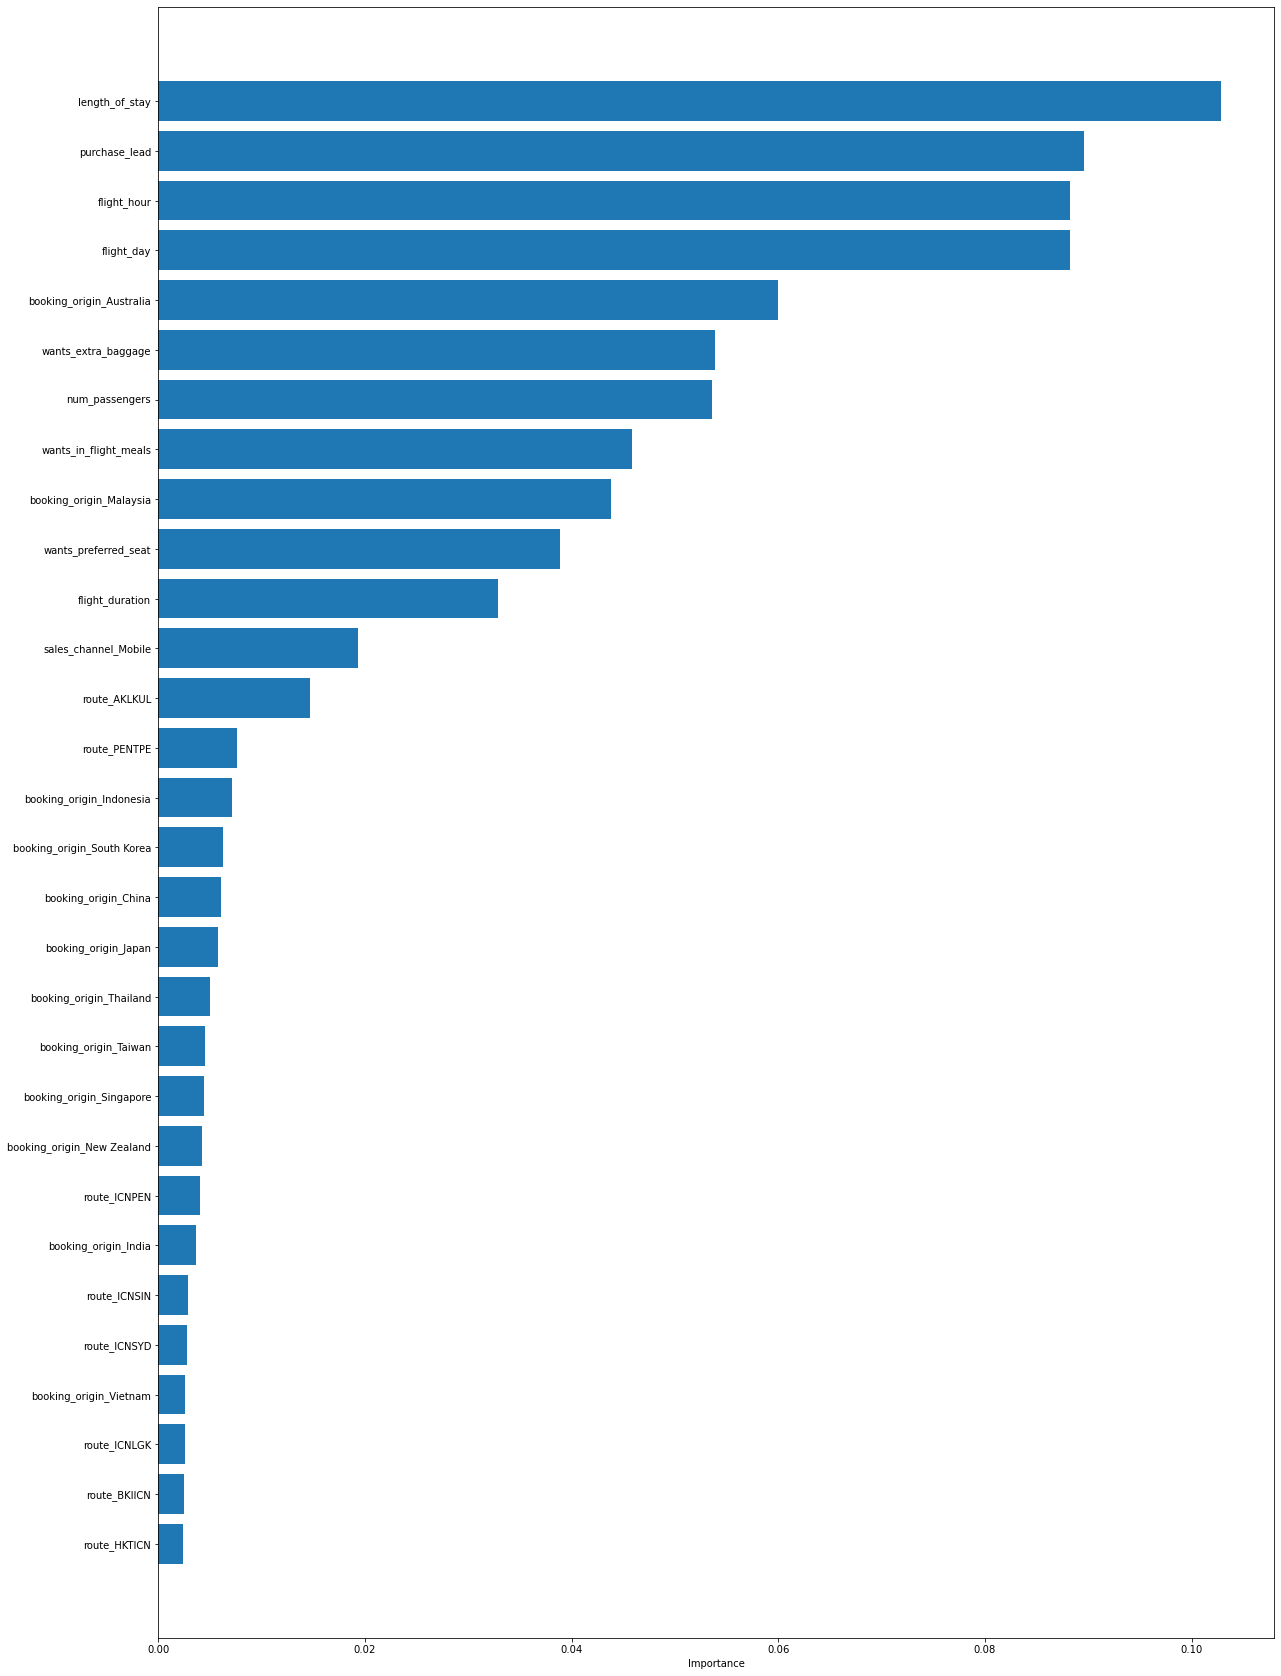

In [112]:
plt.figure(figsize=(20, 30))
plt.barh(range(len(plt_feature_importance)), plt_feature_importance['importance'], align='center')
plt.yticks(range(len(plt_feature_importance)), plt_feature_importance['data_features'])
plt.xlabel('Importance')
plt.show()